In [0]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from torch.autograd import Variable
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [0]:
class FashionMNISTDataset(Dataset):
    '''Fashion MNIST Dataset'''
    def __init__(self, csv_file):
        """
        Args:
            csv_file (string): Path to the csv file
            transform (callable): Optional transform to apply to sample
        """
        
        data = pd.read_csv(csv_file);
        data = data.dropna()
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28)
        self.Y = np.array(data.iloc[:, 0])
        
        del data;
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        item = self.X[idx]
        label = self.Y[idx]
        
        return (item, label)

In [0]:
train_dataset = FashionMNISTDataset(csv_file='/content/fashion-mnist_train.csv');
test_dataset = FashionMNISTDataset(csv_file='/content/fashion-mnist_test.csv')

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True);
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True);

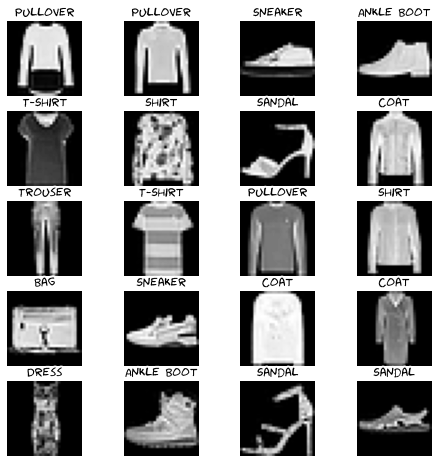

In [194]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [0]:
#instance of the Conv Net
cnn = CNN();
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [197]:
losses = [];
for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))

Epoch : 1/5, Iter : 100/113,  Loss: 0.5329
Epoch : 2/5, Iter : 100/113,  Loss: 0.3340
Epoch : 3/5, Iter : 100/113,  Loss: 0.3301
Epoch : 4/5, Iter : 100/113,  Loss: 0.2062
Epoch : 5/5, Iter : 100/113,  Loss: 0.2248
Epoch : 6/5, Iter : 100/113,  Loss: 0.3187
Epoch : 7/5, Iter : 100/113,  Loss: 0.1827
Epoch : 8/5, Iter : 100/113,  Loss: 0.3075
Epoch : 9/5, Iter : 100/113,  Loss: 0.1688
Epoch : 10/5, Iter : 100/113,  Loss: 0.0579


In [198]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 89.0000 %


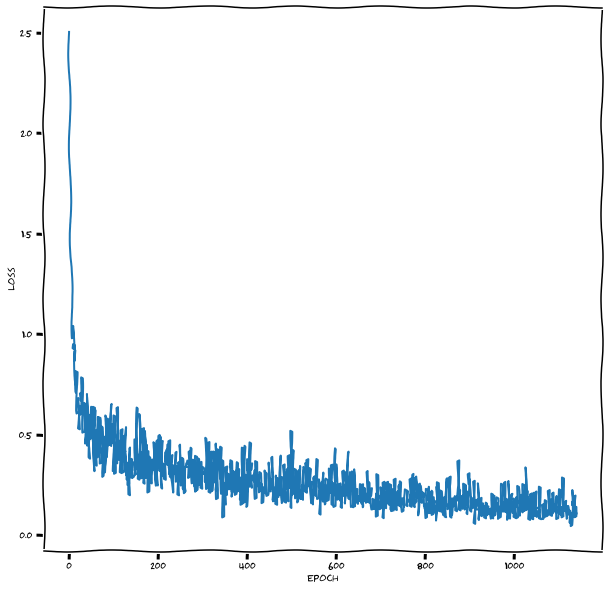

In [201]:
plt.figure(figsize=(10,10))
losses_in_epochs = losses
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(losses_in_epochs)
plt.show()